In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1]:
import pandas as pd

df = pd.read_csv('/content/processed_fastfood.csv')
df.head()

,restaurant,item,calories,total_fat,sodium,fiber,sugar,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7,1110,3.0,11,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45,1580,2.0,18,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,67,1920,3.0,18,70.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31,1940,2.0,18,55.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45,1980,4.0,18,46.0


## Normalize Data



In [2]:

# Identify numerical columns for scaling, excluding 'restaurant' and 'item'
numerical_cols = ['calories', 'total_fat', 'sodium', 'fiber', 'sugar', 'protein']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
df_scaled_data = scaler.fit_transform(df[numerical_cols])

# Create a new DataFrame with scaled data and retain column names
df_scaled = pd.DataFrame(df_scaled_data, columns=numerical_cols)

print("Scaled DataFrame head:")
print(df_scaled.head())
print("\nDescription of scaled data:")
print(df_scaled.describe())

Scaled DataFrame head:
   calories  total_fat    sodium     fiber    sugar   protein
0 -0.534844  -1.065038 -0.198377 -0.379201  0.55337  0.516101
1  1.095426   1.000854  0.483490 -0.712659  1.58968  1.026029
2  2.123205   2.196897  0.976756 -0.379201  1.58968  2.385837
3  0.776460   0.239736  1.005771 -0.712659  1.58968  1.535957
4  1.378951   1.000854  1.063802 -0.045743  1.58968  1.026029

Description of scaled data:
           calories     total_fat        sodium         fiber         sugar  \
count  5.150000e+02  5.150000e+02  5.150000e+02  5.150000e+02  5.150000e+02   
mean   1.379695e-17  5.518779e-17  1.379695e-17  5.518779e-17 -6.898473e-17   
std    1.000972e+00  1.000972e+00  1.000972e+00  1.000972e+00  1.000972e+00   
min   -1.810708e+00 -1.445597e+00 -1.786981e+00 -1.379575e+00 -1.075118e+00   
25%   -7.120476e-01 -6.844785e-01 -6.481186e-01 -7.126588e-01 -6.309850e-01   
50%   -1.449970e-01 -1.951883e-01 -1.983766e-01 -3.792008e-01 -1.868521e-01   
75%    5.638161e-01  4.

In [4]:


# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data and transform it
df_pca_data = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(df_pca_data, columns=[f'PC{i+1}' for i in range(df_scaled.shape[1])])

print("Principal Components DataFrame head:")
print(df_pca.head())

print("\nExplained variance ratio:")
print(pca.explained_variance_ratio_)
print("\nCumulative explained variance ratio:")
print(pca.explained_variance_ratio_.cumsum())

Principal Components DataFrame head:
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.503284  0.241642  0.875242 -0.904035  0.521398  0.096009
1  2.042811 -0.519086  1.387109  0.293205  0.240642  0.112501
2  4.015799 -0.933967  0.888840  0.417177  0.829696 -0.009964
3  2.023212 -0.286829  1.478203 -0.778597  0.288067  0.127002
4  2.567258  0.029467  0.981011  0.156677 -0.071800  0.181753

Explained variance ratio:
[0.60770939 0.17658307 0.11981008 0.05317908 0.03631563 0.00640275]

Cumulative explained variance ratio:
[0.60770939 0.78429246 0.90410254 0.95728162 0.99359725 1.        ]


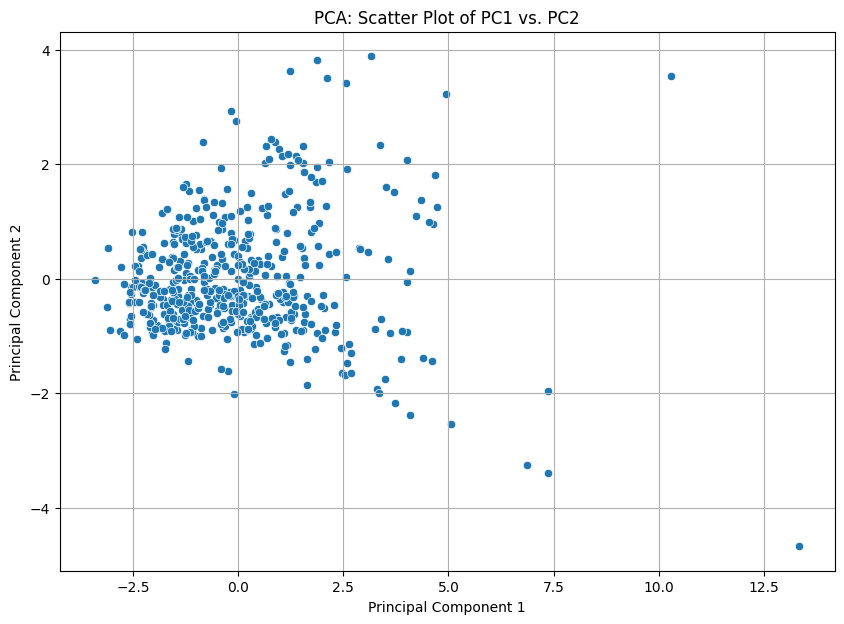

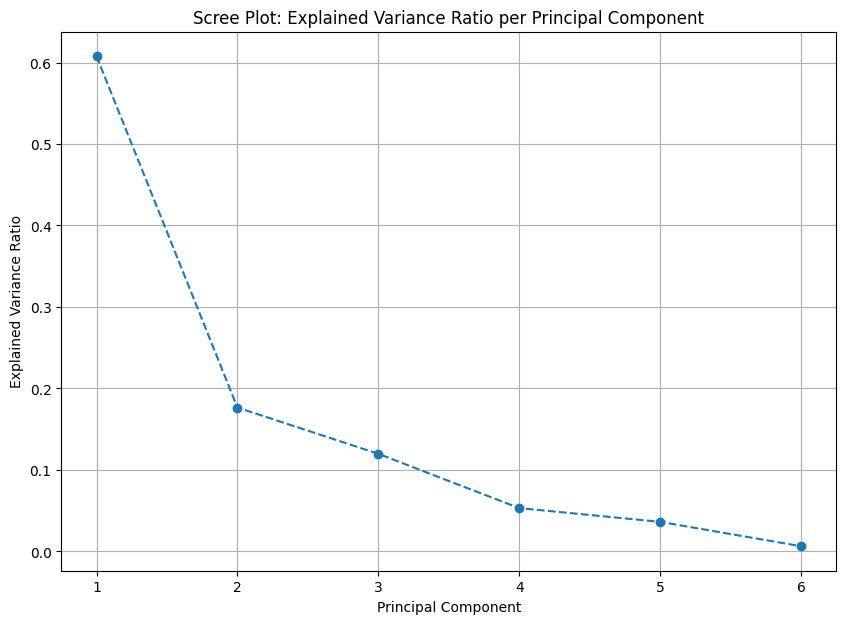

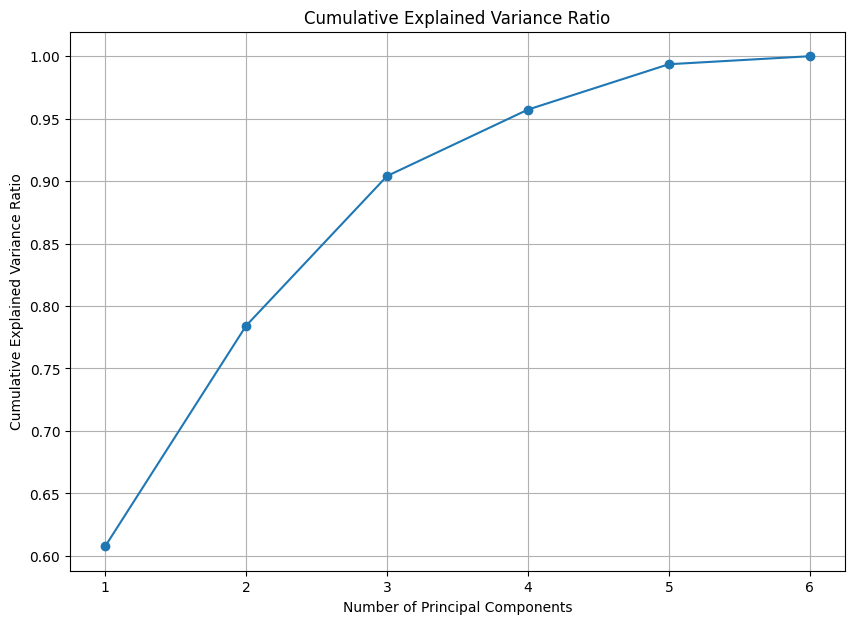

In [8]:

# 1. Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA: Scatter Plot of PC1 vs. PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('pca_scatter_plot.png') # Save the scatter plot
plt.show()

# 2. Scree plot to display explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.savefig('scree_plot_explained_variance.png') # Save the scree plot
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.savefig('cumulative_explained_variance_ratio_plot.png') # Save the cumulative variance plot
plt.show()